In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mnso
from wordcloud import WordCloud,STOPWORDS
from pandas.plotting import scatter_matrix
from datetime import datetime
import squarify
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option("display.float_format",lambda x: '%.5f'% x)

In [4]:
# loading datasets
SouthAfricaCrimeStats_df = pd.read_csv("SouthAfricaCrimeStats_v2.csv")
ProvincePopulation_df = pd.read_csv("ProvincePopulation.csv")
SouthAfricaCrimeStats_df['Total 2005-2016'] = SouthAfricaCrimeStats_df.sum(axis=1)
# making province as index  
SouthAfricaCrimeStats_df.set_index('Province')
ProvincePopulation_df.set_index('Province')

SouthAfricaCrimeStats_df.head()

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  Total 2005-2016  
0       5285       5937       5600       5335       5176            61631  
1       2886       2638       2809       3050       2434            38187  
2       6108       5514       4975       4043       3635            60624  
3       2679       3116       2927       2297       2103            35776  
4       2635       3226       3246       2892       3030            35889

In [5]:
# joining crime stats with province stats
df_outer = pd.merge(SouthAfricaCrimeStats_df, ProvincePopulation_df, on='Province', how='left')
df_outer.head()

Province            Station                           Category  \
0  Western Cape  Cape Town Central  All theft not mentioned elsewhere   
1       Gauteng        Jhb Central  All theft not mentioned elsewhere   
2  Western Cape    Mitchells Plain  All theft not mentioned elsewhere   
3    Free State          Park Road  All theft not mentioned elsewhere   
4       Gauteng   Pretoria Central  All theft not mentioned elsewhere   

   2005-2006  2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  \
0       6692       6341       5966       5187       4985       5127   
1       6093       4602       3761       3610       3267       3037   
2       5341       6093       6316       6803       6035       5761   
3       5108       4282       3834       3316       3101       3013   
4       5099       4536       3309       2694       2616       2606   

   2011-2012  2012-2013  2013-2014  2014-2015  2015-2016  Total 2005-2016  \
0       5285       5937       5600       5335       5176            61631   
1       2886       2638       2809       3050       2434            38187   
2       6108       5514       4975       4043       3635            60624   
3       2679       3116       2927       2297       2103            35776   
4       2635       3226       3246       2892       3030            35889   

   Population    Area   Density  
0     5822734  129462  45.00000  
1    12272263   18178 675.10000  
2     5822734  129462  45.00000  
3     2745590  129825  21.10000  
4    12272263   18178 675.10000

In [6]:
df_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30861 entries, 0 to 30860
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Province         30861 non-null  object 
 1   Station          30861 non-null  object 
 2   Category         30861 non-null  object 
 3   2005-2006        30861 non-null  int64  
 4   2006-2007        30861 non-null  int64  
 5   2007-2008        30861 non-null  int64  
 6   2008-2009        30861 non-null  int64  
 7   2009-2010        30861 non-null  int64  
 8   2010-2011        30861 non-null  int64  
 9   2011-2012        30861 non-null  int64  
 10  2012-2013        30861 non-null  int64  
 11  2013-2014        30861 non-null  int64  
 12  2014-2015        30861 non-null  int64  
 13  2015-2016        30861 non-null  int64  
 14  Total 2005-2016  30861 non-null  int64  
 15  Population       30861 non-null  int64  
 16  Area             30861 non-null  int64  
 17  Density     

<AxesSubplot:>

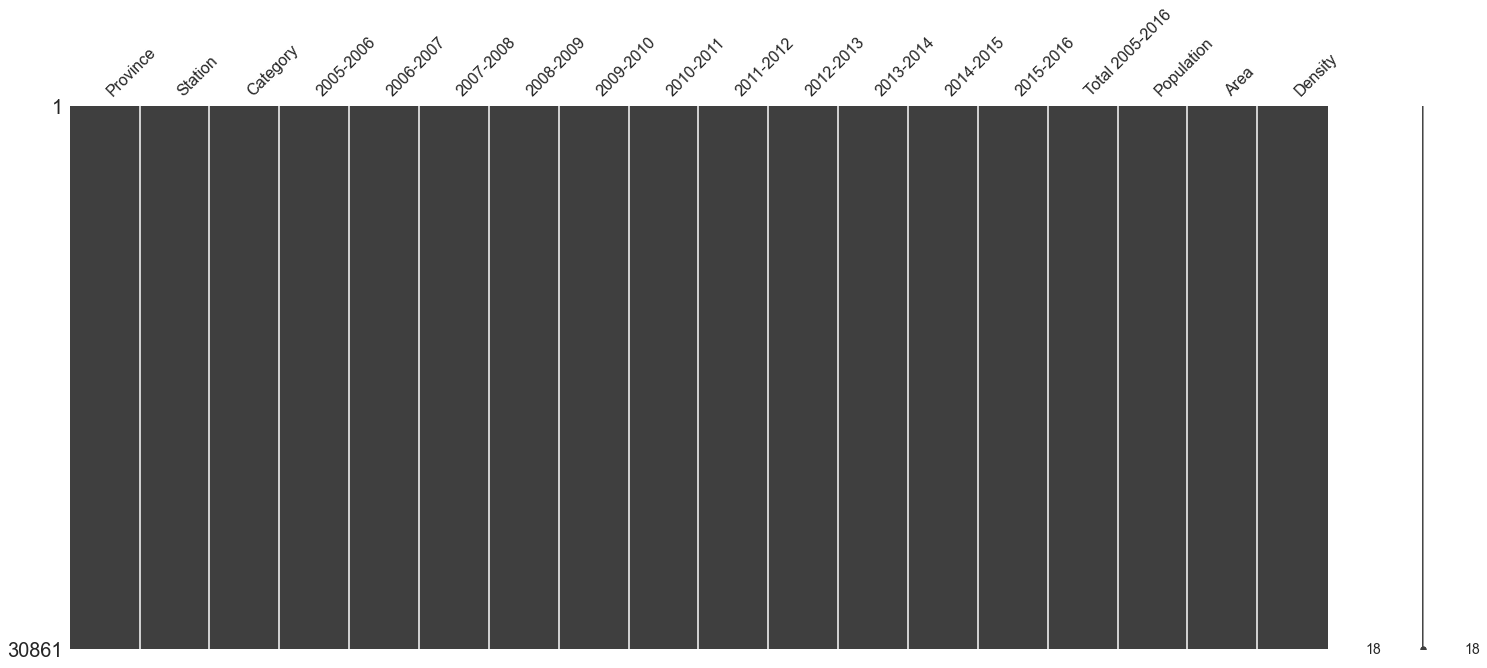

In [7]:
mnso.matrix(df_outer)

## Data Distribution


[Text(0, 0, 'All theft not mentioned elsewhere'),
 Text(1, 0, 'Theft out of or from motor vehicle'),
 Text(2, 0, 'Drug-related crime'),
 Text(3, 0, 'Robbery with aggravating circumstances'),
 Text(4, 0, 'Common assault'),
 Text(5, 0, 'Commercial crime'),
 Text(6, 0, 'Burglary at residential premises'),
 Text(7, 0, 'Assault with the intent to inflict grievous bodily harm'),
 Text(8, 0, 'Theft of motor vehicle and motorcycle'),
 Text(9, 0, 'Shoplifting'),
 Text(10, 0, 'Malicious damage to property'),
 Text(11, 0, 'Common robbery'),
 Text(12, 0, 'Burglary at non-residential premises'),
 Text(13, 0, 'Sexual Offences'),
 Text(14, 0, 'Driving under the influence of alcohol or drugs'),
 Text(15, 0, 'Stock-theft'),
 Text(16, 0, 'Attempted murder'),
 Text(17, 0, 'Carjacking'),
 Text(18, 0, 'Robbery at non-residential premises'),
 Text(19, 0, 'Robbery at residential premises'),
 Text(20, 0, 'Murder'),
 Text(21, 0, 'Illegal possession of firearms and ammunition'),
 Text(22, 0, 'Arson'),
 Text(23,

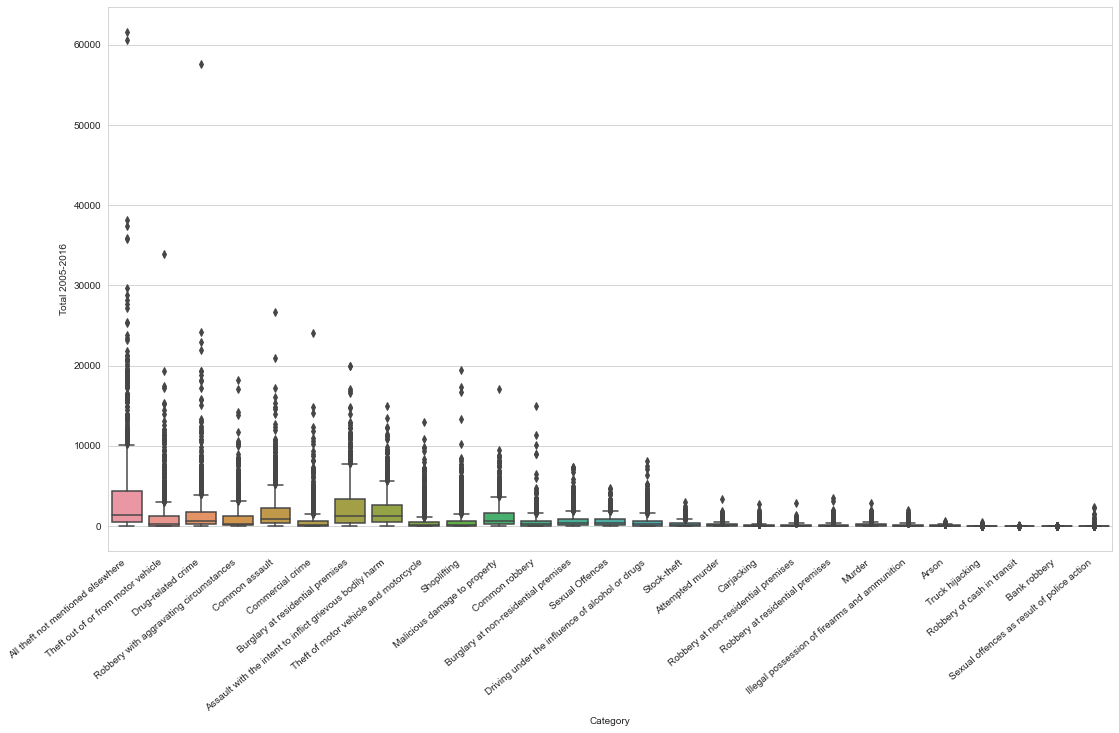

In [8]:
plt.rcParams['figure.figsize']=(18,10)
ax = sns.boxplot(x="Category", y='Total 2005-2016', data=df_outer)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)

In [9]:
# Group Crime Counts by Province
crimes_by_province = df_outer.groupby(['Province'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]
# Group Crime Counts by Category
crimes_by_category = df_outer.groupby(['Category'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]
# Group Crime Counts by Station
crimes_by_station = df_outer.groupby(['Station'])[['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']]

In [10]:
#Add counts, Reset Index & Sort by Total Crimes Between 2005-2016
province_totals = crimes_by_province.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
category_totals = crimes_by_category.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
station_totals = crimes_by_station.sum().reset_index().sort_values('Total 2005-2016',ascending=False)

In [11]:
# Create Total Stations by Province Dataframe
total_province_stations = pd.DataFrame(df_outer['Province'].value_counts()).reset_index()
total_province_stations['Total Stations'] = total_province_stations['Province']
total_province_stations.drop('Province',axis=1,inplace=True)
total_province_stations['Province'] = total_province_stations['index']
total_province_stations.drop('index',axis=1,inplace=True)
total_province_stations

Total Stations       Province
0            5292   Eastern Cape
1            5022  Kwazulu/Natal
2            4050   Western Cape
3            3861        Gauteng
4            2970     Free State
5            2673        Limpopo
6            2457  Northern Cape
7            2322     Mpumalanga
8            2214     North West

In [12]:
# Set Index To Province (To add totals)
province_totals.set_index('Province',inplace=True)
total_province_stations.set_index('Province',inplace=True)
ProvincePopulation_df.set_index('Province',inplace=True)

# Add Totals to province_totals Dataframe
province_totals['Total Stations'] = total_province_stations['Total Stations']
province_totals['Population'] = ProvincePopulation_df['Population']
province_totals['Area'] = ProvincePopulation_df['Area']
province_totals['Density'] = ProvincePopulation_df['Density']

# Reset index back
province_totals = province_totals.reset_index()
total_province_stations = total_province_stations.reset_index()
population_stats = ProvincePopulation_df.reset_index()

Text(0.5, 0, 'South African Provinces')

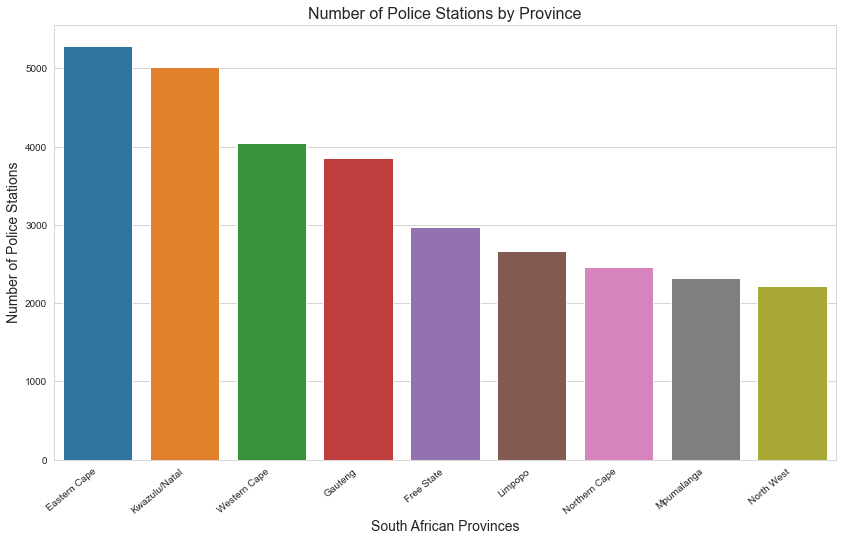

In [13]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=total_province_stations,x='Province',y='Total Stations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'South African Provinces')

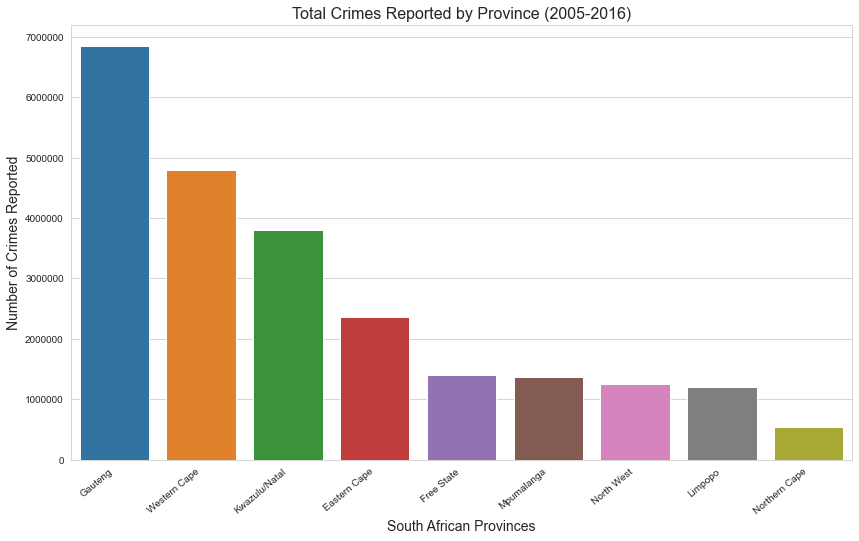

In [14]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
plt.ticklabel_format(style='plain', axis='y')
ax = sns.barplot(data=province_totals,x='Province',y='Total 2005-2016')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Province (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

In [15]:

fig = px.treemap(df_outer, 
                 path=['Category'], 
                 values='Total 2005-2016',
                 color='Total 2005-2016',
                 title = 'Total Crimes Reported by Category (2005-2016)'
                )
fig.show()

Text(0.5, 0, 'South African Police Stations')

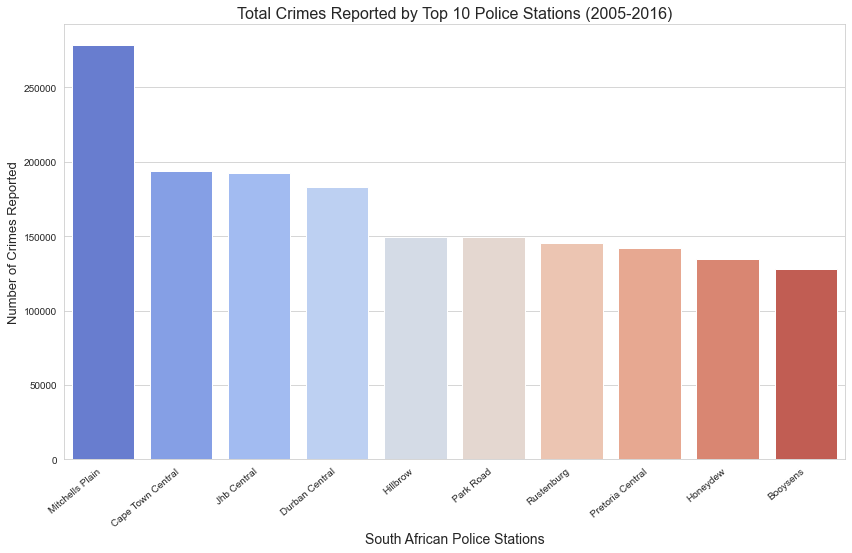

In [16]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.head(10),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Top 10 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

In [17]:
df_outer['Province'].unique()

array(['Western Cape', 'Gauteng', 'Free State', 'North West',
       'Kwazulu/Natal', 'Mpumalanga', 'Eastern Cape', 'Limpopo',
       'Northern Cape'], dtype=object)

Text(0.5, 0, 'South African Police Stations')

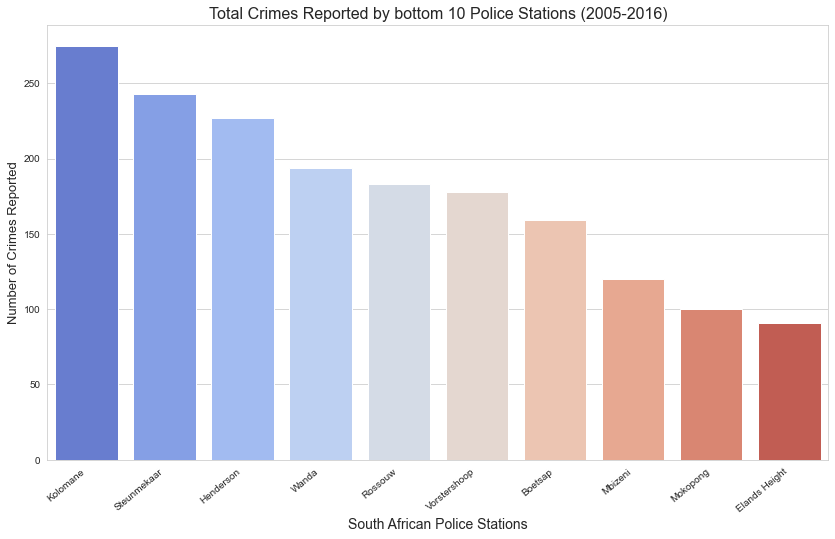

In [18]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.tail(10),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by bottom 10 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

In [19]:
corr = province_totals.corr()
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

In [20]:
def wordcloud_by_province(province):
    df_new = df_outer[df_outer.Province == province]
    stopwords = set(STOPWORDS)
    stopwords.add("Total")
    stopwords.add("Crime")
    stopwords.add("Crimes")
    wordcloud = WordCloud(background_color="Black",stopwords=stopwords,random_state = 0).generate(" ".join([i for i in df_new['Category']]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud of the type of crime")

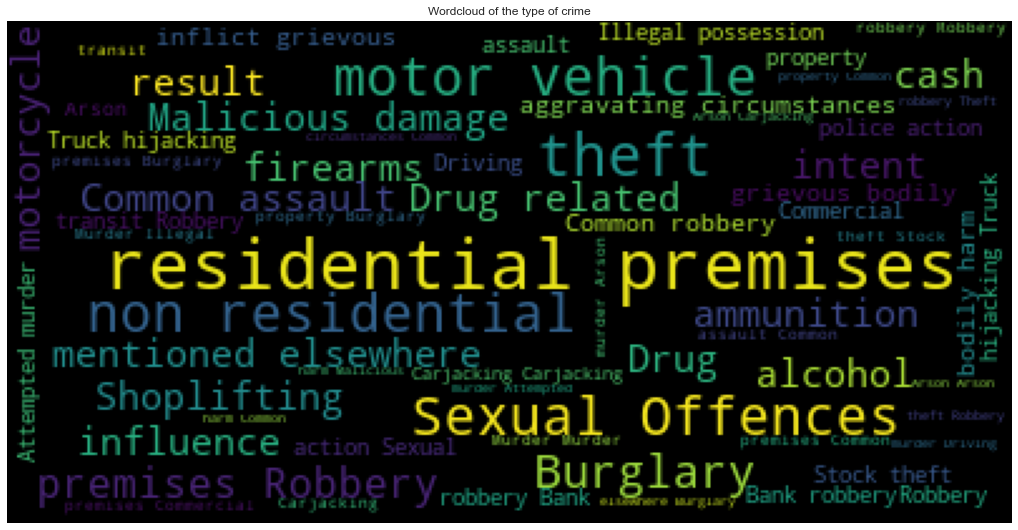

In [21]:
wordcloud_by_province('Western Cape')

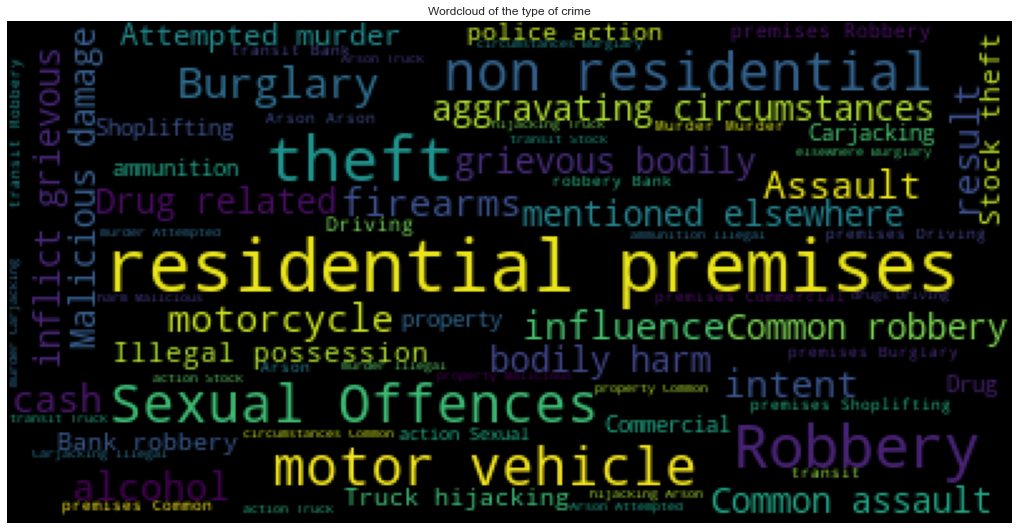

In [22]:
wordcloud_by_province('Gauteng')

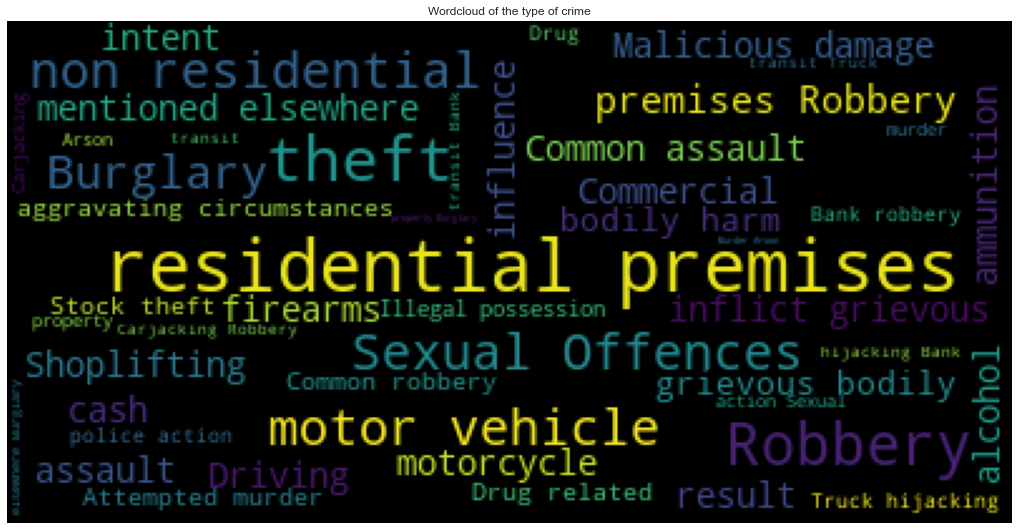

In [23]:
wordcloud_by_province('Free State')

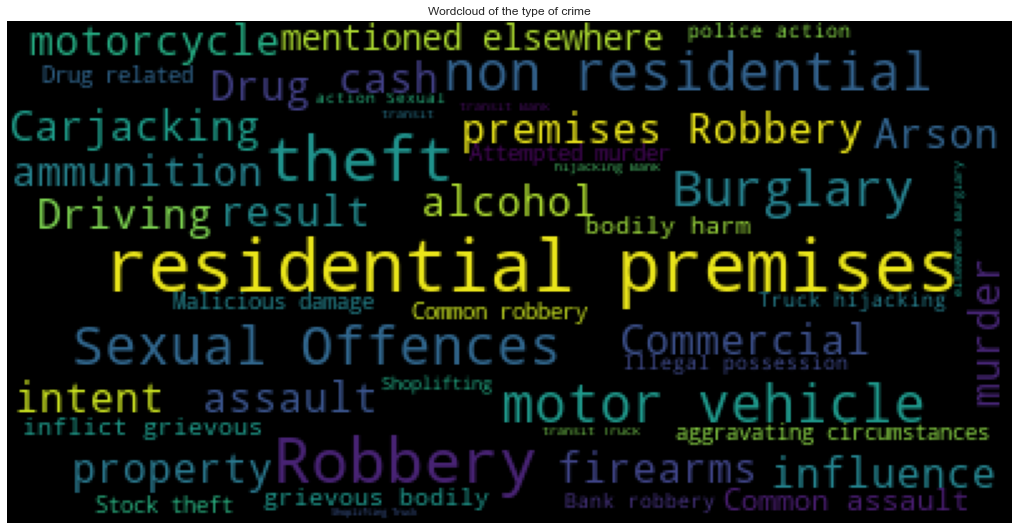

In [24]:
wordcloud_by_province('North West')

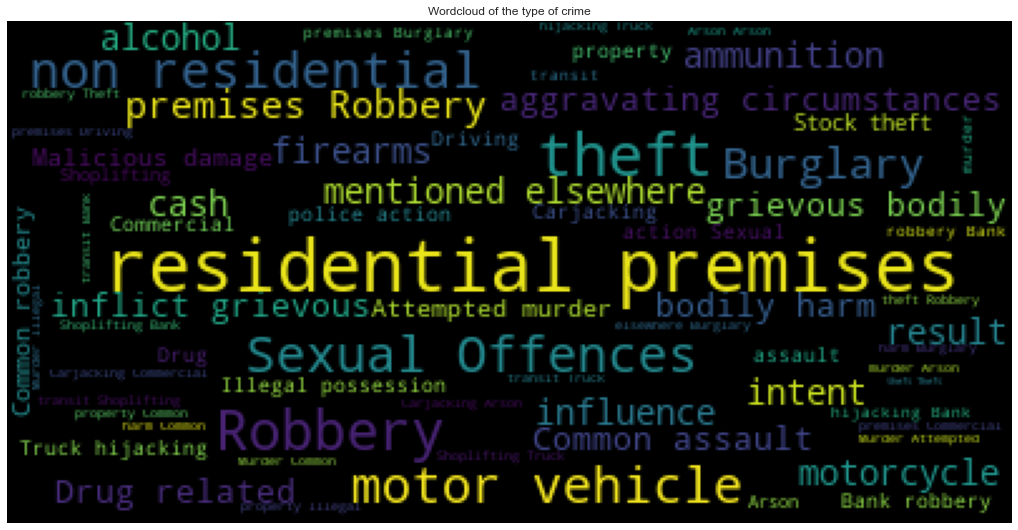

In [25]:
wordcloud_by_province('Kwazulu/Natal')

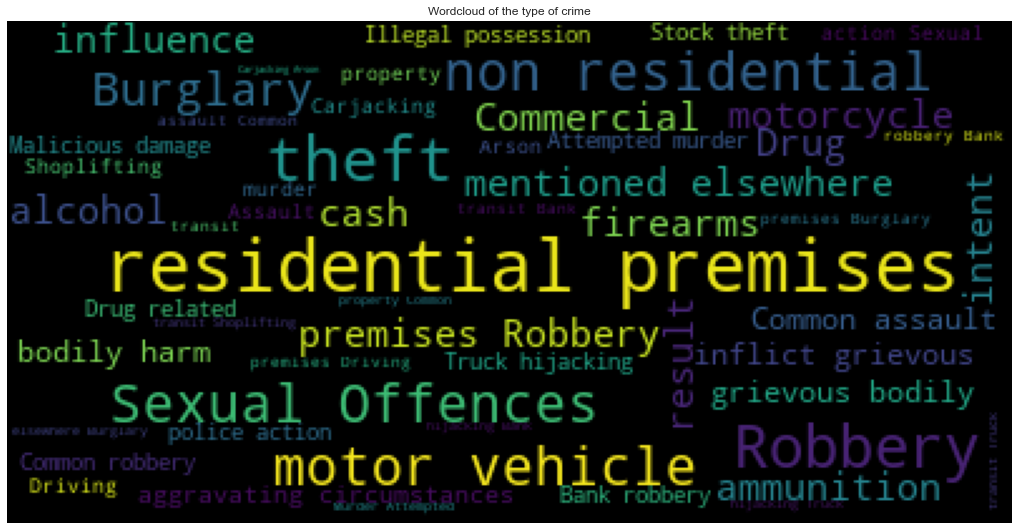

In [26]:
wordcloud_by_province('Mpumalanga')

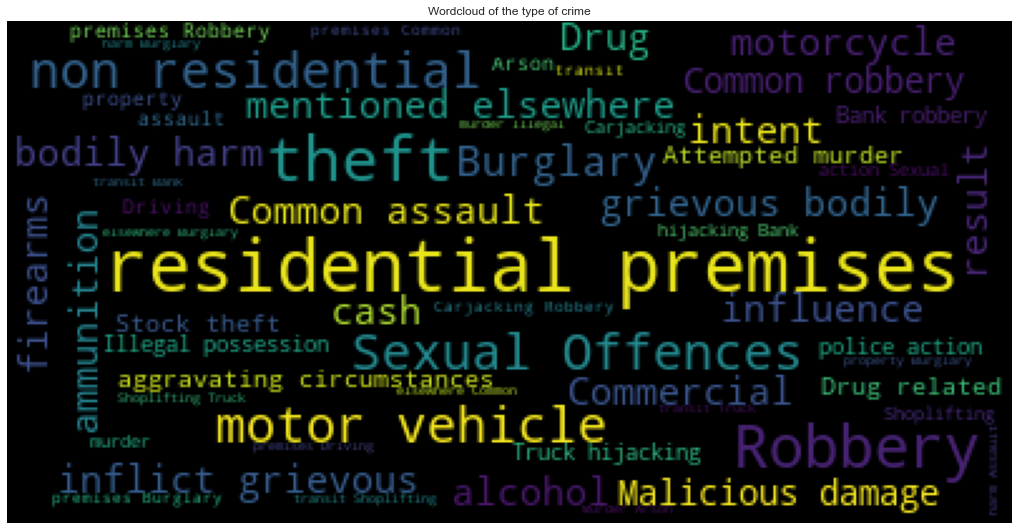

In [27]:
wordcloud_by_province('Limpopo')

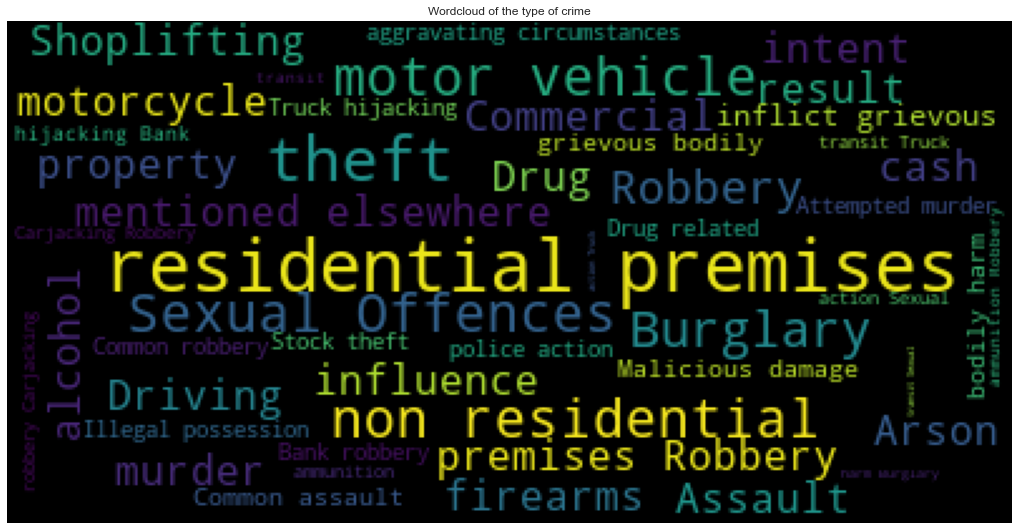

In [28]:
wordcloud_by_province('Northern Cape')

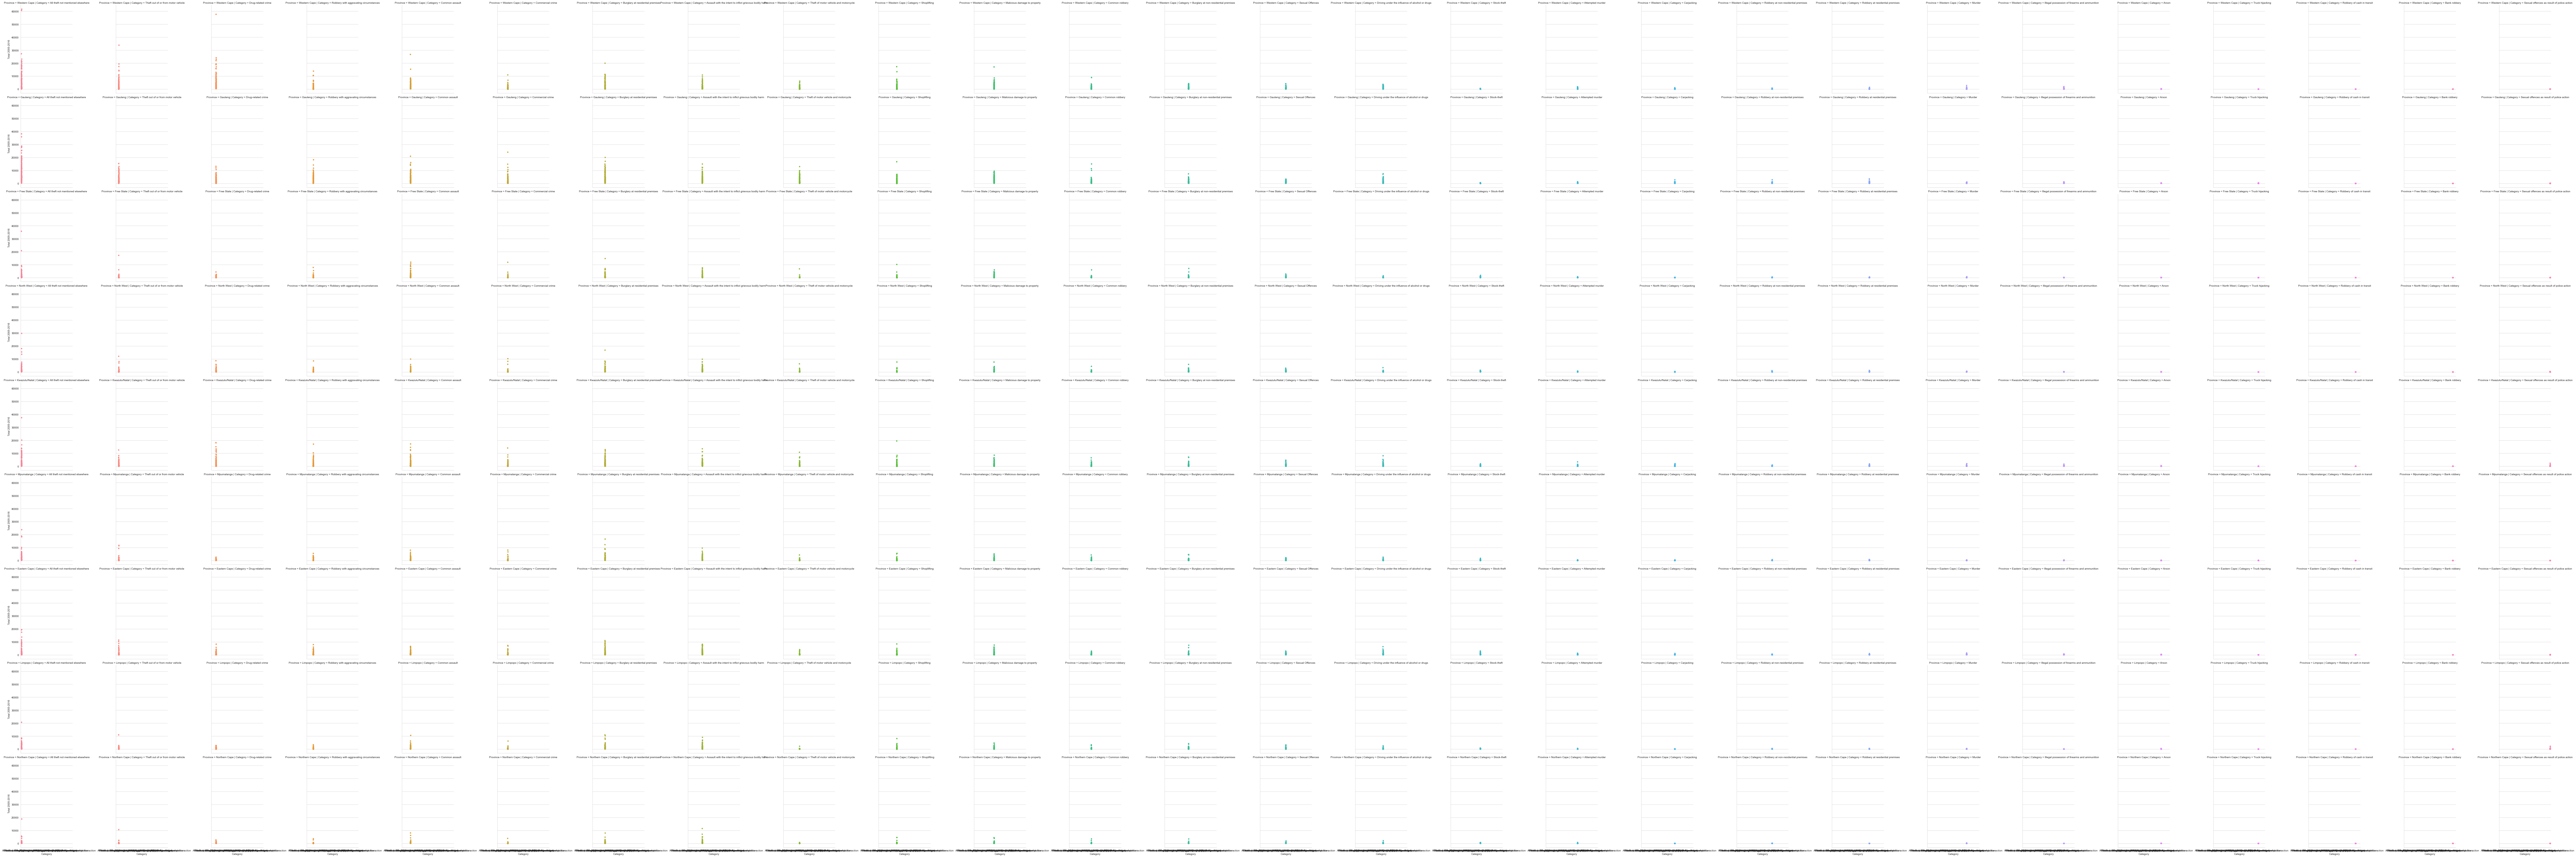

In [29]:
sns.catplot(data=df_outer, x="Category", y="Total 2005-2016", col="Category",row="Province")